In [ ]:
# Import necessary libraries
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the file path
csv_file_path = 'shot_logs.csv'

# Try reading the CSV file with different parameters
try:
    shot_data = pd.read_csv(csv_file_path, on_bad_lines='skip', encoding='utf-8', engine='python')
    print("File read successfully with on_bad_lines='skip' and utf-8 encoding.")
except Exception as e:
    print("Error reading the file:", e)

# Display the first few rows of the data if it was read successfully
if 'shot_data' in locals():
    shot_data.head()
else:
    print("Data not available.")

File read successfully with on_bad_lines='skip' and utf-8 encoding.


# Visualisation 1 : shooting Percentage by Time Left on Shot Clock

In [ ]:
import pandas as pd
import plotly.express as px

# Display the first few rows of the data if it was read successfully
if 'shot_data' in locals():
    shot_data.head()
else:
    print("Data not available.")

# Handle missing values in SHOT_CLOCK if data is available
if 'shot_data' in locals():
    shot_data['SHOT_CLOCK'].fillna(0, inplace=True)

    # Define the time intervals for shot clock categories
    labels = ['21-24s', '18-21s', '15-18s', '12-15s', '9-12s', '6-9s', '3-6s', '0-3s']

    # Categorize SHOT_CLOCK into 8 parts with specific time intervals
    shot_data['SHOT_CLOCK_CATEGORY'] = pd.cut(shot_data['SHOT_CLOCK'], bins=8, labels=labels)

    # Calculate shooting percentage and shots taken for each category
    shot_clock_summary = shot_data.groupby('SHOT_CLOCK_CATEGORY').agg(
        Shots=('SHOT_CLOCK', 'count'),
        Made=('FGM', 'sum')
    ).reset_index()

    shot_clock_summary['Shooting_Percentage'] = (shot_clock_summary['Made'] / shot_clock_summary['Shots']) * 100

    # Define green color scale
    colorscale = [
        [0, 'lightgreen'],   # For low percentages
        [1, 'darkgreen']     # For high percentages
    ]

    # Create bubble chart with larger bubbles
    fig_bubble = px.scatter(
        shot_clock_summary,
        x='SHOT_CLOCK_CATEGORY',
        y='Shooting_Percentage',
        size='Shots',
        color='Shooting_Percentage',
        color_continuous_scale=colorscale,
        size_max=70,  # Increase the maximum size of the bubbles
        labels={
            'SHOT_CLOCK_CATEGORY': 'Time Left on Shot Clock (seconds)',
            'Shooting_Percentage': 'Shooting Percentage (%)',
            'Shots': 'Number of Shots'
        },
        title='Shooting Percentage by Time Left on Shot Clock (Bubble Chart)',
        hover_name='SHOT_CLOCK_CATEGORY',
        hover_data={'Shots': True, 'Shooting_Percentage': True}
    )

    fig_bubble.update_layout(
        margin=dict(l=40, r=40, t=40, b=100),  # Add margin at the bottom
        showlegend=False,
        xaxis=dict(tickangle=-45),  # Rotate x-axis labels if needed
        yaxis=dict(range=[0, 100])  # Adjust y-axis range
    )

    fig_bubble.show()


<ipython-input-3-9d015a76f5d9>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  shot_clock_summary = shot_data.groupby('SHOT_CLOCK_CATEGORY').agg(


In [ ]:
# Option 3: Dual Axis Chart
fig_dual = go.Figure()

fig_dual.add_trace(go.Bar(
    x=shot_clock_summary['SHOT_CLOCK_CATEGORY'],
    y=shot_clock_summary['Shots'],
    name='Shots Taken',
    marker=dict(color='lightblue'),
    yaxis='y'
))

fig_dual.add_trace(go.Scatter(
    x=shot_clock_summary['SHOT_CLOCK_CATEGORY'],
    y=shot_clock_summary['Shooting_Percentage'],
    mode='lines+markers',
    name='Shooting Percentage',
    line=dict(color='darkgreen', width=4, dash='dash'),
    yaxis='y2'
))

fig_dual.update_layout(
    title='Shots Taken and Shooting Percentage by Time Left on Shot Clock',
    xaxis_title='Time Left on Shot Clock (seconds)',
    yaxis=dict(
        title='Shots Taken',
        side='left'
    ),
    yaxis2=dict(
        title='Shooting Percentage (%)',
        overlaying='y',
        side='right'
    ),
    showlegend=True
)

fig_dual.show()


 # Visualisation 2 : Catch and Shoot vs After Dribble Shot

<ipython-input-28-65c995a54aa8>:44: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



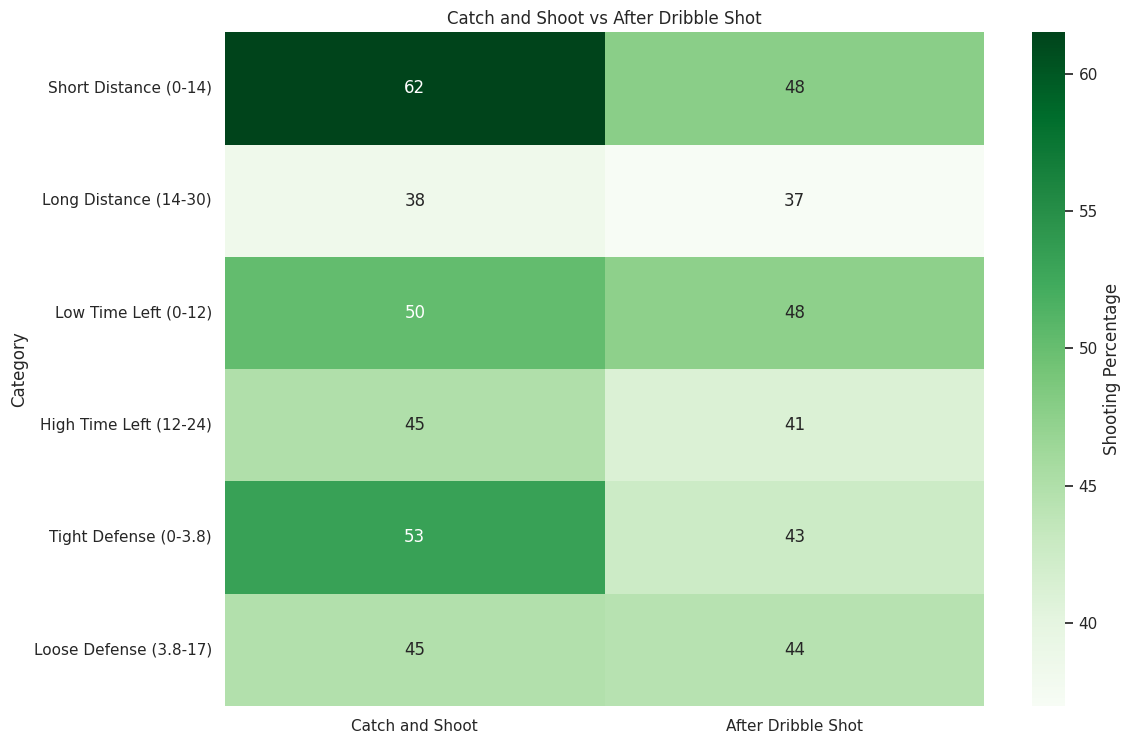

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# עיגול כלפי מעלה של העמודות הנדרשות (למשל, TIME_LEFT, CLOSE_DEF_DIST, DRIBBLES)
shot_data['SHOT_DIST'] = np.ceil(shot_data['SHOT_DIST'])
shot_data['TIME_LEFT'] = np.ceil(shot_data['TIME_LEFT'])
shot_data['CLOSE_DEF_DIST'] = np.ceil(shot_data['CLOSE_DEF_DIST'])
shot_data['DRIBBLES'] = np.ceil(shot_data['DRIBBLES'])

# הגדרת קטגוריות עם תיאורים מדויקים והגדרות טווחים
def create_equal_bins(data, column, low_label, high_label):
    median_value = data[column].median()
    bins = [data[column].min(), median_value, data[column].max()]
    labels = [f'{low_label} ({int(data[column].min())}-{int(median_value)})',
              f'{high_label} ({int(median_value)+1}-{int(data[column].max())})']
    return pd.cut(data[column], bins=bins, labels=labels, right=False)

# שיוך כל זריקה לקבוצה עם שמות הקטגוריות החדשות
shot_data['Distance'] = pd.cut(shot_data['SHOT_DIST'], bins=[0, 14, shot_data['SHOT_DIST'].max()],
                               labels=['Short Distance (0-14)', f'Long Distance (14-{int(shot_data["SHOT_DIST"].max())})'], right=False)
shot_data['Time Left'] = pd.cut(shot_data['TIME_LEFT'], bins=[0, 12, 24],
                                labels=['Low Time Left (0-12)', 'High Time Left (12-24)'], right=False)
shot_data['Defender Distance'] = pd.cut(shot_data['CLOSE_DEF_DIST'], bins=[0, 3.8, shot_data['CLOSE_DEF_DIST'].max()],
                                        labels=['Tight Defense (0-3.8)', f'Loose Defense (3.8-{int(shot_data["CLOSE_DEF_DIST"].max())})'], right=False)

# סיווג זריקות כ-Catch and Shoot או לא
shot_data['Catch and Shoot'] = shot_data['DRIBBLES'] < 1.0

# פונקציה לחישוב אחוזי קליעה
def calculate_shooting_percentage(data):
    return (data['FGM'].sum() / len(data)) * 100

# יצירת טבלה מסכמת עבור Catch and Shoot ולא Catch and Shoot
categories = ['Distance', 'Time Left', 'Defender Distance']
summary_table = pd.DataFrame(columns=['Category', 'Catch and Shoot', 'After Dribble Shot'])

for category in categories:
    for level in shot_data[category].cat.categories:
        catch_and_shoot = calculate_shooting_percentage(shot_data[(shot_data['Catch and Shoot']) & (shot_data[category] == level)])
        not_catch_and_shoot = calculate_shooting_percentage(shot_data[(shot_data['Catch and Shoot'] == False) & (shot_data[category] == level)])
        new_row = {'Category': f'{level}', 'Catch and Shoot': round(catch_and_shoot, 1), 'After Dribble Shot': round(not_catch_and_shoot, 1)}
        summary_table = pd.concat([summary_table, pd.DataFrame([new_row])], ignore_index=True)

# יצירת Heatmap עם קטגוריות חדשות
fig, ax = plt.subplots(figsize=(12, 8))
heatmap_data = summary_table.set_index('Category')
sns.heatmap(heatmap_data, annot=True, cmap="Greens", ax=ax, cbar_kws={'label': 'Shooting Percentage'})
ax.set_xlabel('')
ax.set_xticklabels(['Catch and Shoot', 'After Dribble Shot'])
ax.set_title('Catch and Shoot vs After Dribble Shot')
plt.xticks(rotation=0)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Add extra space for the title
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px

# Define the file path
csv_file_path = 'shot_logs.csv'

# Try reading the CSV file with different parameters
try:
    shot_data = pd.read_csv(csv_file_path, on_bad_lines='skip', encoding='utf-8', engine='python')
    print("File read successfully with on_bad_lines='skip' and utf-8 encoding.")
except Exception as e:
    print("Error reading the file:", e)

# Prepare the data
if 'shot_data' in locals():
    shot_data['SHOT_CLOCK'].fillna(0, inplace=True)
    shot_data['TIME_LEFT'] = 24 - shot_data['SHOT_CLOCK']

    # Round up the necessary columns
    shot_data['SHOT_DIST'] = np.ceil(shot_data['SHOT_DIST'])
    shot_data['TIME_LEFT'] = np.ceil(shot_data['TIME_LEFT'])
    shot_data['CLOSE_DEF_DIST'] = np.ceil(shot_data['CLOSE_DEF_DIST'])

    # Classify shots as Catch and Shoot or not
    shot_data['Catch and Shoot'] = shot_data['DRIBBLES'] < 1.0

    # Create categories with descriptive names and ranges
    shot_data['Distance'] = pd.cut(shot_data['SHOT_DIST'],
                                   bins=[0, 14, shot_data['SHOT_DIST'].max()],
                                   labels=['Short Distance (0-14 feet)',
                                           f'Long Distance (14+ feet)'], right=False)

    shot_data['Time Left'] = pd.cut(shot_data['TIME_LEFT'],
                                    bins=[0, 12, 24],
                                    labels=['Low Time Left (0-12 seconds)',
                                            'High Time Left (12-24 seconds)'], right=False)

    shot_data['Defender Distance'] = pd.cut(shot_data['CLOSE_DEF_DIST'],
                                            bins=[0, 3.8, shot_data['CLOSE_DEF_DIST'].max()],
                                            labels=['Tight Defense (0-3.8 feet)',
                                                    f'Loose Defense (3.8+ feet)'], right=False)

    # Define a function to calculate shooting percentage
    def calculate_shooting_percentage(data):
        return (data['FGM'].sum() / len(data)) * 100

    # Create summary tables for Catch and Shoot and Not Catch and Shoot
    categories = ['Distance', 'Time Left', 'Defender Distance']
    summary_table = pd.DataFrame(columns=['Category', 'Type', 'Shooting Percentage'])

    for category in categories:
        for level in shot_data[category].cat.categories:
            catch_and_shoot = calculate_shooting_percentage(shot_data[(shot_data['Catch and Shoot']) & (shot_data[category] == level)])
            not_catch_and_shoot = calculate_shooting_percentage(shot_data[(shot_data['Catch and Shoot'] == False) & (shot_data[category] == level)])
            summary_table = pd.concat([summary_table, pd.DataFrame([{'Category': f'{level}', 'Type': 'Catch and Shoot', 'Shooting Percentage': catch_and_shoot}])])
            summary_table = pd.concat([summary_table, pd.DataFrame([{'Category': f'{level}', 'Type': 'After Dribble Shot', 'Shooting Percentage': not_catch_and_shoot}])])

    # Plot the summary table using Plotly
    fig = px.bar(summary_table, x='Category', y='Shooting Percentage', color='Type', barmode='group',
                 title='Shooting Percentage Comparison: Catch and Shoot vs After Dribble Shot',
                 color_discrete_map={'Catch and Shoot': 'royalblue', 'After Dribble Shot': 'darkorange'})

    # Update layout to set y-axis range to 70, rotate x-axis labels, and adjust bar width
    fig.update_layout(
        xaxis_title='Category',
        yaxis_title='Shooting Percentage',
        legend_title_text='Type',
        yaxis=dict(range=[0, 70]),  # This sets the y-axis limit to 70
        bargap=0.38,
        xaxis_tickfont_size=11  # This sets the font size for the x-axis labels
    )

    fig.show()


File read successfully with on_bad_lines='skip' and utf-8 encoding.


<ipython-input-35-ce77265654ad>:56: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



# Visualisation 3 : Shooting Percentage & Shot Count Comparison: LeBron James vs Stephen Curry

In [ ]:
import pandas as pd
import plotly.express as px

# Filter data for LeBron James and Stephen Curry
lebron_curry_data = shot_data[shot_data['player_name'].isin(['lebron james', 'stephen curry'])]

# Define bins and labels with descriptive names including ranges
lebron_curry_data['Distance'] = pd.cut(lebron_curry_data['SHOT_DIST'],
                                       bins=[0, 14, lebron_curry_data['SHOT_DIST'].max()],
                                       labels=['Short Distance (0-14 feet)',
                                               f'Long Distance (14+ feet)'], right=False)

lebron_curry_data['Time Left'] = pd.cut(lebron_curry_data['TIME_LEFT'],
                                        bins=[0, 12, 24],
                                        labels=['Low Time Left (0-12 seconds)',
                                                'High Time Left (12-24 seconds)'], right=False)

lebron_curry_data['Defender Distance'] = pd.cut(lebron_curry_data['CLOSE_DEF_DIST'],
                                                bins=[0, 3.8, lebron_curry_data['CLOSE_DEF_DIST'].max()],
                                                labels=['Tight Defense (0-3.8 feet)',
                                                        f'Loose Defense (3.8+ feet)'], right=False)

lebron_curry_data['Dribbles'] = pd.cut(lebron_curry_data['DRIBBLES'],
                                       bins=[0, 1, lebron_curry_data['DRIBBLES'].max()],
                                       labels=['Few Dribbles (0-1)',
                                               'Many Dribbles (2+)'], right=False)

# Define the functions to calculate shooting percentage and count shots
def calculate_shooting_percentage(data):
    return (data['FGM'].sum() / len(data)) * 100

def count_shots(data):
    return len(data)

# Create a summary table for each category separately
categories = ['Distance', 'Time Left', 'Defender Distance', 'Dribbles']
summary_table = pd.DataFrame(columns=['Category', 'Player', 'Shooting Percentage', 'Shot Count'])

for category in categories:
    for level in lebron_curry_data[category].cat.categories:
        lebron_pct = calculate_shooting_percentage(lebron_curry_data[(lebron_curry_data['player_name'] == 'lebron james') & (lebron_curry_data[category] == level)])
        curry_pct = calculate_shooting_percentage(lebron_curry_data[(lebron_curry_data['player_name'] == 'stephen curry') & (lebron_curry_data[category] == level)])
        lebron_count = count_shots(lebron_curry_data[(lebron_curry_data['player_name'] == 'lebron james') & (lebron_curry_data[category] == level)])
        curry_count = count_shots(lebron_curry_data[(lebron_curry_data['player_name'] == 'stephen curry') & (lebron_curry_data[category] == level)])
        summary_table = pd.concat([summary_table, pd.DataFrame([{'Category': f'{level}', 'Player': 'LeBron James', 'Shooting Percentage': round(lebron_pct, 1), 'Shot Count': lebron_count}])])
        summary_table = pd.concat([summary_table, pd.DataFrame([{'Category': f'{level}', 'Player': 'Stephen Curry', 'Shooting Percentage': round(curry_pct, 1), 'Shot Count': curry_count}])])

# Ensure that 'Shot Count' is numeric
summary_table['Shot Count'] = summary_table['Shot Count'].astype(float)

# Plot the summary table using Plotly's scatter plot for bubble chart
fig = px.scatter(summary_table, x='Category', y='Shooting Percentage', color='Player',
                 size='Shot Count', hover_name='Category',
                 title='Shooting Percentage & Shot Count Comparison: LeBron James vs Stephen Curry (Bubble Chart)',
                 labels={'Shot Count': 'Number of Shots'},
                 size_max=23,  # Increase the maximum size of the bubbles
                 color_discrete_map={'LeBron James': 'royalblue', 'Stephen Curry': 'darkorange'})

# Update layout to make the chart larger
fig.update_layout(
    xaxis_title='Category',
    yaxis_title='Shooting Percentage',
    legend_title_text='Player',
    yaxis=dict(range=[25, 68]),  # This sets the y-axis limit to 70
    xaxis_tickangle=28,  # This rotates the x-axis labels to the right
    xaxis_tickfont_size=11,  # This sets the font size for the x-axis labels
    width=1300,  # Increase the width of the chart
    height=700  # Increase the height of the chart
)

fig.show()


<ipython-input-41-21621f021ca7>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-41-21621f021ca7>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-41-21621f021ca7>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-41-21621

In [11]:
import pandas as pd
import plotly.express as px

famous_players = [
    'LeBron James', 'Kobe Bryant', 'Stephen Curry', 'Kevin Durant',
    'Chris Paul', 'Tim Duncan', 'Dirk Nowitzki', 'Dwyane Wade',
    'Kawhi Leonard', 'Russell Westbrook', 'James Harden', 'Carmelo Anthony',
    'Paul Pierce', 'Klay Thompson', 'Pau Gasol', 'Blake Griffin',
    'Anthony Davis', 'Marc Gasol', 'Damian Lillard', 'Giannis Antetokounmpo'
]

# Filter data for the list of famous players
famous_players_data = shot_data[shot_data['player_name'].isin([
    player.lower() for player in famous_players
])]

# Define bins and labels with descriptive names including ranges
famous_players_data['Distance'] = pd.cut(famous_players_data['SHOT_DIST'],
                                         bins=[0, 14, famous_players_data['SHOT_DIST'].max()],
                                         labels=['Short Distance (0-14 feet)',
                                                 f'Long Distance (14+ feet)'], right=False)

famous_players_data['Time Left'] = pd.cut(famous_players_data['TIME_LEFT'],
                                          bins=[0, 12, 24],
                                          labels=['Low Time Left (0-12 seconds)',
                                                  'High Time Left (12-24 seconds)'], right=False)

famous_players_data['Defender Distance'] = pd.cut(famous_players_data['CLOSE_DEF_DIST'],
                                                  bins=[0, 3.8, famous_players_data['CLOSE_DEF_DIST'].max()],
                                                  labels=['Tight Defense (0-3.8 feet)',
                                                          f'Loose Defense (3.8+ feet)'], right=False)

famous_players_data['Dribbles'] = pd.cut(famous_players_data['DRIBBLES'],
                                         bins=[0, 1, famous_players_data['DRIBBLES'].max()],
                                         labels=['Few Dribbles (0-1)',
                                                 'Many Dribbles (2+)'], right=False)

# Define the functions to calculate shooting percentage and count shots
def calculate_shooting_percentage(data):
    return (data['FGM'].sum() / len(data)) * 100

def count_shots(data):
    return len(data)

# Create a summary table for each category separately
categories = ['Distance', 'Time Left', 'Defender Distance', 'Dribbles']
summary_table = pd.DataFrame(columns=['Category', 'Player', 'Shooting Percentage', 'Shot Count'])

for category in categories:
    for level in famous_players_data[category].cat.categories:
        for player in famous_players:
            player_pct = calculate_shooting_percentage(famous_players_data[(famous_players_data['player_name'] == player.lower()) & (famous_players_data[category] == level)])
            player_count = count_shots(famous_players_data[(famous_players_data['player_name'] == player.lower()) & (famous_players_data[category] == level)])
            summary_table = pd.concat([summary_table, pd.DataFrame([{'Category': f'{level}', 'Player': player, 'Shooting Percentage': round(player_pct, 1), 'Shot Count': player_count}])])

# Ensure that 'Shot Count' is numeric
summary_table['Shot Count'] = summary_table['Shot Count'].astype(float)

# Plot the summary table using Plotly's scatter plot for bubble chart
fig = px.scatter(summary_table, x='Category', y='Shooting Percentage', color='Player',
                 size='Shot Count', hover_name='Category',
                 title='Shooting Percentage & Shot Count Comparison: Famous NBA Players (Bubble Chart)',
                 labels={'Shot Count': 'Number of Shots'},
                 size_max=23,  # Increase the maximum size of the bubbles
                 )

# Update layout to make the chart larger
fig.update_layout(
    xaxis_title='Category',
    yaxis_title='Shooting Percentage',
    legend_title_text='Player',
    yaxis=dict(range=[20, 70]),  # This sets the y-axis limit
    xaxis_tickangle=28,  # This rotates the x-axis labels to the right
    xaxis_tickfont_size=11,  # This sets the font size for the x-axis labels
    width=1300,  # Increase the width of the chart
    height=700  # Increase the height of the chart
)

fig.show()


<ipython-input-11-f19ea8799acb>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  famous_players_data['Distance'] = pd.cut(famous_players_data['SHOT_DIST'],
<ipython-input-11-f19ea8799acb>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  famous_players_data['Time Left'] = pd.cut(famous_players_data['TIME_LEFT'],
<ipython-input-11-f19ea8799acb>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Filter data for LeBron James and Stephen Curry
lebron_curry_data = shot_data[shot_data['player_name'].isin(['lebron james', 'stephen curry'])]

# Apply the manual splits with descriptive labels and ranges
lebron_curry_data['Distance'] = pd.cut(lebron_curry_data['SHOT_DIST'],
                                       bins=[0, 14, lebron_curry_data['SHOT_DIST'].max()],
                                       labels=['Short Distance (0-14 feet)', f'Long Distance (14+ feet)'], right=False)

lebron_curry_data['Time Left'] = pd.cut(lebron_curry_data['TIME_LEFT'],
                                        bins=[0, 12, 24],
                                        labels=['Low Time Left (0-12 seconds)', 'High Time Left (12-24 seconds)'], right=False)

lebron_curry_data['Defender Distance'] = pd.cut(lebron_curry_data['CLOSE_DEF_DIST'],
                                                bins=[0, 3.8, lebron_curry_data['CLOSE_DEF_DIST'].max()],
                                                labels=['Tight Defense (0-3.8 feet)', f'Loose Defense (3.8+ feet)'], right=False)

lebron_curry_data['Dribbles'] = pd.cut(lebron_curry_data['DRIBBLES'],
                                       bins=[0, 1, lebron_curry_data['DRIBBLES'].max()],
                                       labels=['Few Dribbles (0-1)', f'Many Dribbles (2+)'], right=False)

# Define the functions to calculate shooting percentage and count shots
def calculate_shooting_percentage(data):
    return (data['FGM'].sum() / len(data)) * 100

def count_shots(data):
    return len(data)

# Create a summary table for each category separately
categories = ['Distance', 'Time Left', 'Defender Distance', 'Dribbles']
summary_table = pd.DataFrame(columns=['Category', 'Player', 'Shooting Percentage', 'Shot Count'])

for category in categories:
    for level in lebron_curry_data[category].cat.categories:
        lebron_pct = calculate_shooting_percentage(lebron_curry_data[(lebron_curry_data['player_name'] == 'lebron james') & (lebron_curry_data[category] == level)])
        curry_pct = calculate_shooting_percentage(lebron_curry_data[(lebron_curry_data['player_name'] == 'stephen curry') & (lebron_curry_data[category] == level)])
        lebron_count = count_shots(lebron_curry_data[(lebron_curry_data['player_name'] == 'lebron james') & (lebron_curry_data[category] == level)])
        curry_count = count_shots(lebron_curry_data[(lebron_curry_data['player_name'] == 'stephen curry') & (lebron_curry_data[category] == level)])
        summary_table = pd.concat([summary_table, pd.DataFrame([{'Category': f'{level}', 'Player': 'LeBron James', 'Shooting Percentage': lebron_pct, 'Shot Count': lebron_count}])])
        summary_table = pd.concat([summary_table, pd.DataFrame([{'Category': f'{level}', 'Player': 'Stephen Curry', 'Shooting Percentage': curry_pct, 'Shot Count': curry_count}])])

# Create the figure
fig = go.Figure()

# Add lines for LeBron James
lebron_data = summary_table[summary_table['Player'] == 'LeBron James']
fig.add_trace(go.Scatter(
    x=lebron_data['Category'],
    y=lebron_data['Shooting Percentage'],
    mode='lines+markers',
    name='LeBron James Shooting Percentage',
    line=dict(width=3.8, color='royalblue'),  # Blue line for LeBron
    marker=dict(size=12)
))

# Add lines for Stephen Curry
curry_data = summary_table[summary_table['Player'] == 'Stephen Curry']
fig.add_trace(go.Scatter(
    x=curry_data['Category'],
    y=curry_data['Shooting Percentage'],
    mode='lines+markers',
    name='Stephen Curry Shooting Percentage',
    line=dict(width=3.8, color='darkorange'),  # Orange line for Curry
    marker=dict(size=12)
))

# Add bar chart for Shot Counts (right y-axis)
fig.add_trace(go.Bar(
    x=lebron_data['Category'],
    y=lebron_data['Shot Count'],
    name='LeBron James Shot Count',
    marker=dict(color='royalblue'),  # Same blue for LeBron
    yaxis='y2',
    opacity=0.8
))

fig.add_trace(go.Bar(
    x=curry_data['Category'],
    y=curry_data['Shot Count'],
    name='Stephen Curry Shot Count',
    marker=dict(color='darkorange'),  # Same orange for Curry
    yaxis='y2',
    opacity=0.8
))

# Update layout for a polished look
fig.update_layout(
    title='Shooting Percentage & Shot Count Comparison: LeBron James vs Stephen Curry',
    xaxis_title='Category',
    yaxis_title='Shooting Percentage',
    legend_title_text='Player',
    yaxis=dict(range=[10, 70]),  # Set y-axis range from 10% to 70%
    yaxis2=dict(range=[0, 1500], overlaying='y', side='right', title='Shot Count'),  # Set y2-axis range from 0 to 1500
    xaxis_tickangle=28,  # Rotate x-axis labels
    xaxis_tickfont_size=12,  # Increase font size for x-axis labels
    width=1380,  # Wider figure for better readability
    height=900,  # Adjust height accordingly
    template='plotly_white',  # Use a white theme
    font=dict(size=15)  # Increase overall font size
)

# Show the figure
fig.show()


<ipython-input-43-65788cd758da>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-43-65788cd758da>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-43-65788cd758da>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-43-65788

# Visualisation 4 : Impact of Different Factors on Shooting Percentage

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

# Define the file path
csv_file_path = 'shot_logs.csv'

# Try reading the CSV file with different parameters
try:
    shot_data = pd.read_csv(csv_file_path, on_bad_lines='skip', encoding='utf-8', engine='python')
    print("File read successfully with on_bad_lines='skip' and utf-8 encoding.")
except Exception as e:
    print("Error reading the file:", e)

# Prepare the data
if 'shot_data' in locals():
    shot_data['SHOT_CLOCK'].fillna(0, inplace=True)

    # Calculate time left on the shot clock
    shot_data['TIME_LEFT'] = 24 - shot_data['SHOT_CLOCK']

    # Classify shots as Catch and Shoot or not
    shot_data['Catch and Shoot'] = shot_data['DRIBBLES'] < 1.0

    # Create categories with descriptive names and ranges
    shot_data['Distance'] = pd.cut(shot_data['SHOT_DIST'],
                                   bins=[0, 14, shot_data['SHOT_DIST'].max()],
                                   labels=['Short Distance (0-14 feet)',
                                           f'Long Distance (14+ feet)'], right=False)

    shot_data['Time Left'] = pd.cut(shot_data['TIME_LEFT'],
                                    bins=[0, 12, 24],
                                    labels=['Low Time Left (0-12 seconds)',
                                            'High Time Left (12-24 seconds)'], right=False)

    shot_data['Defender Distance'] = pd.cut(shot_data['CLOSE_DEF_DIST'],
                                            bins=[0, 3.8, shot_data['CLOSE_DEF_DIST'].max()],
                                            labels=['Tight Defense (0-3.8 feet)',
                                                    f'Loose Defense (3.8+ feet)'], right=False)

    shot_data['Dribbles'] = pd.cut(shot_data['DRIBBLES'],
                                   bins=[0, 1, shot_data['DRIBBLES'].max()],
                                   labels=['Few Dribbles (0-1)',
                                           'Many Dribbles (2+)'], right=False)

    # Calculate average shooting percentage for each group
    radar_data = shot_data.groupby(['Distance', 'Time Left', 'Defender Distance', 'Dribbles']).agg({
        'FGM': 'sum',
        'SHOT_CLOCK': 'count'
    }).reset_index()

    radar_data['Shooting_Percentage'] = (radar_data['FGM'] / radar_data['SHOT_CLOCK']) * 100

    # Prepare data for radar chart
    categories = ['Distance', 'Time Left', 'Defender Distance', 'Dribbles']

    radar_values = []
    radar_labels = []

    for category in categories:
        radar_values.extend(radar_data.groupby(category)['Shooting_Percentage'].mean().tolist())
        radar_labels.extend([f"{label}" for label in radar_data[category].unique()])

    fig = go.Figure()

    fig.add_trace(go.Scatterpolar(
        r=radar_values,
        theta=radar_labels,
        fill='toself',
        name='Shooting Percentage'
    ))

    fig.update_layout(
        polar=dict(
            radialaxis=dict(visible=True)
        ),
        showlegend=True,
        title='Impact of Different Factors on Shooting Percentage',
        width=1000,  # Adjust the width
        height=1000,  # Adjust the height
        margin=dict(l=230, r=150, t=150, b=150)  # Adjust the margins to center the chart
    )

    fig.show()


File read successfully with on_bad_lines='skip' and utf-8 encoding.


<ipython-input-39-6c798c19e77e>:47: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-39-6c798c19e77e>:61: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [1]:
# prompt: save shot_log.csv as df

import pandas as pd
shot_data = pd.read_csv('shot_logs.csv')


In [2]:
shot_data

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128064,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,5,3,1:52,18.3,5,...,8.7,2,missed,"Smart, Marcus",203935,0.8,0,0,jarrett jack,101127
128065,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,6,4,11:28,19.8,4,...,0.6,2,made,"Turner, Evan",202323,0.6,1,2,jarrett jack,101127
128066,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,7,4,11:10,23.0,2,...,16.9,2,made,"Thornton, Marcus",201977,4.2,1,2,jarrett jack,101127
128067,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,8,4,2:37,9.1,4,...,18.3,2,missed,"Bradley, Avery",202340,3.0,0,0,jarrett jack,101127


In [21]:
import pandas as pd

# List of players and their respective teams
players_teams = {
    'brian roberts': 'Charlotte Hornets',
    'bismack biyombo': 'Charlotte Hornets',
    'al jefferson': 'Charlotte Hornets',
    'cody zeller': 'Charlotte Hornets',
    'gary neal': 'Charlotte Hornets',
    'gerald henderson': 'Charlotte Hornets',
    'kemba walker': 'Charlotte Hornets',
    'michael kidd-gilchrist': 'Charlotte Hornets',
    'lance stephenson': 'Charlotte Hornets',
    'marvin williams': 'Charlotte Hornets',
    'jason maxiell': 'Charlotte Hornets',
    'gordon hayward': 'Utah Jazz',
    'trevor booker': 'Utah Jazz',
    'enes kanter': 'Utah Jazz',
    'derrick favors': 'Utah Jazz',
    'dante exum': 'Utah Jazz',
    'jon ingles': 'Utah Jazz',
    'trey burke': 'Utah Jazz',
    'rudy gobert': 'Utah Jazz',
    'carlos boozer': 'Los Angeles Lakers',
    'jeremy lin': 'Los Angeles Lakers',
    'kobe bryant': 'Los Angeles Lakers',
    'ed davis': 'Los Angeles Lakers',
    'ronnie price': 'Los Angeles Lakers',
    'wayne ellington': 'Los Angeles Lakers',
    'wesley johnson': 'Los Angeles Lakers',
    'jordan hill': 'Los Angeles Lakers',
    'nick young': 'Los Angeles Lakers',
    'robert sacre': 'Los Angeles Lakers',
    'harrison barnes': 'Golden State Warriors',
    'leandro barbosa': 'Golden State Warriors',
    'stephen curry': 'Golden State Warriors',
    'klay thompson': 'Golden State Warriors',
    'marreese speights': 'Golden State Warriors',
    'shaun livingston': 'Golden State Warriors',
    'andrew bogut': 'Golden State Warriors',
    'andre iguodala': 'Golden State Warriors',
    'draymond green': 'Golden State Warriors',
    'al horford': 'Atlanta Hawks',
    'thabo sefolosha': 'Atlanta Hawks',
    'dennis schroder': 'Atlanta Hawks',
    'paul millsap': 'Atlanta Hawks',
    'kyle korver': 'Atlanta Hawks',
    'pero antic': 'Atlanta Hawks',
    'kent bazemore': 'Atlanta Hawks',
    'mike scott': 'Atlanta Hawks',
    'jeff teague': 'Atlanta Hawks',
    'demarre carroll': 'Atlanta Hawks',
    'marcin gortat': 'Washington Wizards',
    'otto porter': 'Washington Wizards',
    'kris humphries': 'Washington Wizards',
    'bradley beal': 'Washington Wizards',
    'andre miller': 'Washington Wizards',
    'garrett temple': 'Washington Wizards',
    'kevin seraphin': 'Washington Wizards',
    'paul pierce': 'Washington Wizards',
    'rasual butler': 'Washington Wizards',
    'nene hilario': 'Washington Wizards',
    'john wall': 'Washington Wizards',
    'omer asik': 'New Orleans Pelicans',
    'jrue holiday': 'New Orleans Pelicans',
    'ryan anderson': 'New Orleans Pelicans',
    'tyreke evans': 'New Orleans Pelicans',
    'luke babbitt': 'New Orleans Pelicans',
    'anthony davis': 'New Orleans Pelicans',
    'dante cunningham': 'New Orleans Pelicans',
    'alexis ajinca': 'New Orleans Pelicans',
    'jimmer dredette': 'New Orleans Pelicans',
    'tyler hansbrough': 'Toronto Raptors',
    'kyle lowry': 'Toronto Raptors',
    'terrence ross': 'Toronto Raptors',
    'amir johnson': 'Toronto Raptors',
    'greivis vasquez': 'Toronto Raptors',
    'lou williams': 'Toronto Raptors',
    'james johnson': 'Toronto Raptors',
    'jonas valanciunas': 'Toronto Raptors',
    'patrick patterson': 'Toronto Raptors',
    'mnta ellis': 'Dallas Mavericks',
    'tyson chandler': 'Dallas Mavericks',
    'jose juan barea': 'Dallas Mavericks',
    'devin harris': 'Dallas Mavericks',
    'greg smith': 'Dallas Mavericks',
    'charlie villanueva': 'Dallas Mavericks',
    'al farouq aminu': 'Dallas Mavericks',
    'chandler parsons': 'Dallas Mavericks',
    'richard jefferson': 'Dallas Mavericks',
    'dirk nowtizski': 'Dallas Mavericks',
    'tobias harris': 'Orlando Magic',
    'evan fournier': 'Orlando Magic',
    'aaron gordon': 'Orlando Magic',
    'channing frye': 'Orlando Magic',
    'victor oladipo': 'Orlando Magic',
    'elfrid payton': 'Orlando Magic',
    'kyle oquinn': 'Orlando Magic',
    'nikola vucevic': 'Orlando Magic',
    'ben gordon': 'Orlando Magic',
    'matthew dellavedova': 'Cleveland Cavaliers',
    'kyrie irving': 'Cleveland Cavaliers',
    'shawn marion': 'Cleveland Cavaliers',
    'lebron james': 'Cleveland Cavaliers',
    'tristan thompson': 'Cleveland Cavaliers',
    'kevin love': 'Cleveland Cavaliers',
    'mike miller': 'Cleveland Cavaliers',
    'joe harris': 'Cleveland Cavaliers',
    'lavoy allen': 'Indiana Pacers',
    'chris copeland': 'Indiana Pacers',
    'luis scola': 'Indiana Pacers',
    'donald sloan': 'Indiana Pacers',
    'damjan rudez': 'Indiana Pacers',
    'cj watson': 'Indiana Pacers',
    'cj miles': 'Indiana Pacers',
    'rodney stuckey': 'Indiana Pacers',
    'roy hibbert': 'Indiana Pacers',
    'david west': 'Indiana Pacers',
    'solomon hill': 'Indiana Pacers',
    'avery bradley': 'Boston Celtics',
    'marcus thornton': 'Boston Celtics',
    'tyler zeller': 'Boston Celtics',
    'evan turner': 'Boston Celtics',
    'jared sullinger': 'Boston Celtics',
    'brandon bass': 'Boston Celtics',
    'marcus smart': 'Boston Celtics',
    'kelly olynyk': 'Boston Celtics',
    'jeff green': 'Boston Celtics',
    'marco belinelli': 'San Antonio Spurs',
    'manu ginobili': 'San Antonio Spurs',
    'cory joseph': 'San Antonio Spurs',
    'kawhi leonard': 'San Antonio Spurs',
    'matt bonner': 'San Antonio Spurs',
    'boris diaw': 'San Antonio Spurs',
    'danny green': 'San Antonio Spurs',
    'aron baynes': 'San Antonio Spurs',
    'tony parker': 'San Antonio Spurs',
    'tim duncan': 'San Antonio Spurs',
    'alonzo gee': 'Denver Nuggets',
    'wilson chandler': 'Denver Nuggets',
    'nate robinson': 'Denver Nuggets',
    'ty lawson': 'Denver Nuggets',
    'timofey mozgov': 'Denver Nuggets',
    'arron afflalo': 'Denver Nuggets',
    'jusuf nurkic': 'Denver Nuggets',
    'darrell arthur': 'Denver Nuggets',
    'danilo gallinai': 'Denver Nuggets',
    'kenneth faried': 'Denver Nuggets',
    'jj hickson': 'Denver Nuggets',
    'pj tucker': 'Phoenix Suns',
    'goran dragic': 'Phoenix Suns',
    'gerald green': 'Phoenix Suns',
    'isaiah thomas': 'Phoenix Suns',
    'marcus morris': 'Phoenix Suns',
    'eric bledsoe': 'Phoenix Suns',
    'alex len': 'Phoenix Suns',
    'markieff morris': 'Phoenix Suns',
    'robert covington': 'Philadelphia 76ers',
    'nerles noel': 'Philadelphia 76ers',
    'jerami grant': 'Philadelphia 76ers',
    'michael carter-williams': 'Philadelphia 76ers',
    'kj mcdaniels': 'Philadelphia 76ers',
    'hollis thompson': 'Philadelphia 76ers',
    'jakarr sampson': 'Philadelphia 76ers',
    'luc mbah a moute': 'Philadelphia 76ers',
    'henry sims': 'Philadelphia 76ers',
    'john henson': 'Milwaukee Bucks',
    'zaza pachulia': 'Milwaukee Bucks',
    'jared dudley': 'Milwaukee Bucks',
    'oj mayo': 'Milwaukee Bucks',
    'brandon knight': 'Milwaukee Bucks',
    'khris middleton': 'Milwaukee Bucks',
    'giannis antetokounmpo': 'Milwaukee Bucks',
    'jerryd bayless': 'Milwaukee Bucks',
    'zach randolph': 'Memphis Grizzlies',
    'vince carter': 'Memphis Grizzlies',
    'jon leuer': 'Memphis Grizzlies',
    'kosta koufos': 'Memphis Grizzlies',
    'tony allen': 'Memphis Grizzlies',
    'marc gasol': 'Memphis Grizzlies',
    'courtney lee': 'Memphis Grizzlies',
    'beno urdih': 'Memphis Grizzlies',
    'mike conley': 'Memphis Grizzlies',
    'jason smith': 'New York Knicks',
    'cole aldrich': 'New York Knicks',
    'travis wear': 'New York Knicks',
    'quincy acy': 'New York Knicks',
    'shane larkin': 'New York Knicks',
    'amare stoudemire': 'New York Knicks',
    'jose calderon': 'New York Knicks',
    'carmelo anthony': 'New York Knicks',
    'pablo prigioni': 'New York Knicks',
    'time hardaway jr': 'New York Knicks',
    'greg monroe': 'Detroit Pistons',
    'kentavious caldwell-pope': 'Detroit Pistons',
    'dj augustin': 'Detroit Pistons',
    'caron butler': 'Detroit Pistons',
    'andre drummond': 'Detroit Pistons',
    'jonas jerebko': 'Detroit Pistons',
    'kyle singler': 'Detroit Pistons',
    'brandon jennings': 'Detroit Pistons',
    'kostas papanikolaou': 'Houston Rockets',
    'trevor ariza': 'Houston Rockets',
    'jason terry': 'Houston Rockets',
    'donatas motiejunas': 'Houston Rockets',
    'james harden': 'Houston Rockets',
    'patrick beverley': 'Houston Rockets',
    'dwight howard': 'Houston Rockets',
    'joey dorsey': 'Houston Rockets',
    'mario chalmers': 'Miami Heat',
    'udonis haslem': 'Miami Heat',
    'shawne williams': 'Miami Heat',
    'chris bosh': 'Miami Heat',
    'chris andersen': 'Miami Heat',
    'dwayne wade': 'Miami Heat',
    'shabazz napier': 'Miami Heat',
    'james ennis': 'Miami Heat',
    'norris cole': 'Miami Heat',
    'luol deng': 'Miami Heat',
    'jason thompson': 'Sacramento Kings',
    'ray mccallum': 'Sacramento Kings',
    'carl landry': 'Sacramento Kings',
    'ben mclemore': 'Sacramento Kings',
    'derrick williams': 'Sacramento Kings',
    'darren collison': 'Sacramento Kings',
    'nik stauskas': 'Sacramento Kings',
    'demarcus cousins': 'Sacramento Kings',
    'rudy gay': 'Sacramento Kings',
    'omri casspi': 'Sacramento Kings',
    'ramon sessions': 'Sacramento Kings',
    'nick collison': 'Oklahoma City Thunder',
    'reggie jackson': 'Oklahoma City Thunder',
    'kendrick perkins': 'Oklahoma City Thunder',
    'serge ibaka': 'Oklahoma City Thunder',
    'anthony morrow': 'Oklahoma City Thunder',
    'russell westbrook': 'Oklahoma City Thunder',
    'andre roberson': 'Oklahoma City Thunder',
    'jeremy lamb': 'Oklahoma City Thunder',
    'steve adams': 'Oklahoma City Thunder',
    'jamal crawford': 'Los Angeles Clippers',
    'matt barnes': 'Los Angeles Clippers',
    'jj redick': 'Los Angeles Clippers',
    'chris paul': 'Los Angeles Clippers',
    'deandre jordan': 'Los Angeles Clippers',
    'hedo turkoglu': 'Los Angeles Clippers',
    'spencer hawes': 'Los Angeles Clippers',
    'jordan farmar': 'Los Angeles Clippers',
    'blake griffin': 'Los Angeles Clippers',
    'glen davis': 'Los Angeles Clippers',
    'kirk hinrich': 'Chicago Bulls',
    'pau gasol': 'Chicago Bulls',
    'taj gibson': 'Chicago Bulls',
    'derrick rose': 'Chicago Bulls',
    'jimmy butler': 'Chicago Bulls',
    'nikola mirotic': 'Chicago Bulls',
    'tony snell': 'Chicago Bulls',
    'aaron brooks': 'Chicago Bulls',
    'joakim noah': 'Chicago Bulls',
    'cj mccollum': 'Portland Trail Blazers',
    'wesley matthews': 'Portland Trail Blazers',
    'steve blake': 'Portland Trail Blazers',
    'lamarcus aldridge': 'Portland Trail Blazers',
    'alan crabbe': 'Portland Trail Blazers',
    'nicolas batum': 'Portland Trail Blazers',
    'damian lillard': 'Portland Trail Blazers',
    'chris kaman': 'Portland Trail Blazers',
    'andrew wiggins': 'Minnesota Timberwolves',
    'gorgui dieng': 'Minnesota Timberwolves',
    'mo williams': 'Minnesota Timberwolves',
    'anthony bennett': 'Minnesota Timberwolves',
    'zach lavine': 'Minnesota Timberwolves',
    'shabazz muhammad': 'Minnesota Timberwolves',
    'thaddeus young': 'Minnesota Timberwolves',
    'chase budinger': 'Minnesota Timberwolves',
    'robbie hummel': 'Minnesota Timberwolves',
    'brook lopez': 'Brooklyn Nets',
    'mirza teletovic': 'Brooklyn Nets',
    'mason plumlee': 'Brooklyn Nets',
    'kevin garnett': 'Brooklyn Nets',
    'alan anderson': 'Brooklyn Nets',
    'deron williams': 'Brooklyn Nets',
    'joe johnson': 'Brooklyn Nets',
    'jerome jordan': 'Brooklyn Nets',
    'bojan bogdanovic': 'Brooklyn Nets',
    'jarrett jack': 'Brooklyn Nets'
}

# Convert to DataFrame
df = pd.DataFrame(list(players_teams.items()), columns=['Player', 'team_name'])

# Save to CSV file
df.to_csv('players_teams.csv', index=False)

print("CSV file saved successfully!")


CSV file saved successfully!


In [20]:
import pandas as pd

# Read the players_teams.csv into a DataFrame
player_df = pd.read_csv('players_teams.csv')

# Merge shot_log with player_df to add team_name
shot_data = shot_data.merge(player_df, how='left', left_on='player_name', right_on='Player')

# Drop the redundant 'Player' column if needed
shot_data = shot_data.drop(columns=['Player'])

shot_data


,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,PTS,player_name,player_id,TIME_LEFT,Distance_category,Time Left_category,Defender Distance_category,Dribbles_category,Team,team_name
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,2,brian roberts,203148,13.2,Short Distance (0-14 feet),High Time Left (12-24 seconds),Tight Defense (0-3.8 feet),Many Dribbles (2+),Charlotte Hornets,Charlotte Hornets
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,0,brian roberts,203148,20.6,Long Distance (14+ feet),High Time Left (12-24 seconds),Loose Defense (3.8+ feet),Few Dribbles (0-1),Charlotte Hornets,Charlotte Hornets
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,0.0,3,...,0,brian roberts,203148,24.0,Short Distance (0-14 feet),NaN,Tight Defense (0-3.8 feet),Many Dribbles (2+),Charlotte Hornets,Charlotte Hornets
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,0,brian roberts,203148,13.7,Long Distance (14+ feet),High Time Left (12-24 seconds),Tight Defense (0-3.8 feet),Many Dribbles (2+),Charlotte Hornets,Charlotte Hornets
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,0,brian roberts,203148,13.1,Short Distance (0-14 feet),High Time Left (12-24 seconds),Tight Defense (0-3.8 feet),Many Dribbles (2+),Charlotte Hornets,Charlotte Hornets
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128064,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,5,3,1:52,18.3,5,...,0,jarrett jack,101127,5.7,Short Distance (0-14 feet),Low Time Left (0-12 seconds),Tight Defense (0-3.8 feet),Many Dribbles (2+),Brooklyn Nets,Brooklyn Nets
128065,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,6,4,11:28,19.8,4,...,2,jarrett jack,101127,4.2,Short Distance (0-14 feet),Low Time Left (0-12 seconds),Tight Defense (0-3.8 feet),Many Dribbles (2+),Brooklyn Nets,Brooklyn Nets
128066,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,7,4,11:10,23.0,2,...,2,jarrett jack,101127,1.0,Long Distance (14+ feet),Low Time Left (0-12 seconds),Loose Defense (3.8+ feet),Many Dribbles (2+),Brooklyn Nets,Brooklyn Nets
128067,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,8,4,2:37,9.1,4,...,0,jarrett jack,101127,14.9,Long Distance (14+ feet),High Time Left (12-24 seconds),Tight Defense (0-3.8 feet),Many Dribbles (2+),Brooklyn Nets,Brooklyn Nets


<ipython-input-23-5fd34e697747>:58: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  shooting_percentage = team_df.groupby(f'{label}_category')['FGM'].mean() * 100


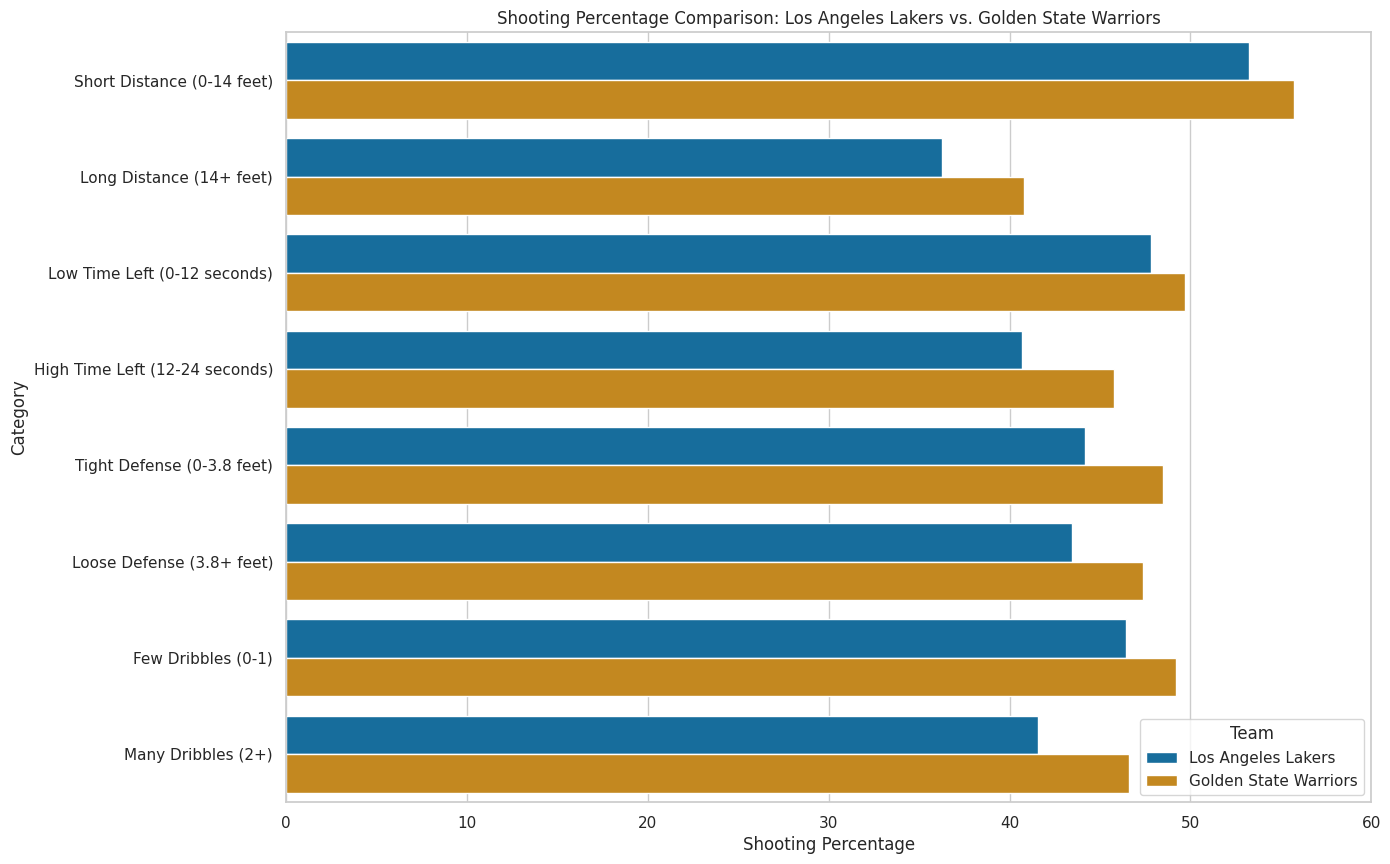

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Prepare the data
if 'shot_data' in locals():
    shot_data['SHOT_CLOCK'].fillna(0, inplace=True)

    # Calculate time left on the shot clock
    shot_data['TIME_LEFT'] = 24 - shot_data['SHOT_CLOCK']

    # Define thresholds manually
    thresholds = {
        'SHOT_DIST': 'Distance',
        'TIME_LEFT': 'Time Left',
        'CLOSE_DEF_DIST': 'Defender Distance',
        'DRIBBLES': 'Dribbles'
    }

    # Define function to categorize data into categories with descriptive names and ranges
    def categorize_data(data, column):
        if column == 'DRIBBLES':
            bins = [0, 1, data[column].astype(float).max()]
            labels = ['Few Dribbles (0-1)', f'Many Dribbles (2+)']
        elif column == 'SHOT_DIST':
            bins = [0, 14, data[column].astype(float).max()]
            labels = ['Short Distance (0-14 feet)', f'Long Distance (14+ feet)']
        elif column == 'TIME_LEFT':
            bins = [0, 12, 24]
            labels = ['Low Time Left (0-12 seconds)', 'High Time Left (12-24 seconds)']
        elif column == 'CLOSE_DEF_DIST':
            bins = [0, 3.8, data[column].astype(float).max()]
            labels = ['Tight Defense (0-3.8 feet)', f'Loose Defense (3.8+ feet)']

        short = data[data[column].astype(float) <= bins[1]]
        long = data[data[column].astype(float) > bins[1]]
        return short, long, labels, bins

    # Create bins for each threshold
    shot_data_categories = {}
    for column, label in thresholds.items():
        short, long, category_labels, category_bins = categorize_data(shot_data, column)
        shot_data[f'{label}_category'] = pd.cut(shot_data[column].astype(float), bins=category_bins, labels=category_labels, right=False)
        shot_data_categories[label] = (category_labels, category_bins)

    # Filter data for Los Angeles Lakers and Golden State Warriors
    teams = ['Los Angeles Lakers', 'Golden State Warriors']
    team_data = shot_data[shot_data['team_name'].isin(teams)]

    # Calculate shooting percentage for each category for each team
    team_summaries = []
    for team in teams:
        team_df = team_data[team_data['team_name'] == team]
        team_summary = []
        for label in thresholds.values():
            shooting_percentage = team_df.groupby(f'{label}_category')['FGM'].mean() * 100
            team_summary.extend([(team, lvl, pct) for lvl, pct in shooting_percentage.items()])
        team_summaries.extend(team_summary)

    # Prepare data for plotting
    comparison_df = pd.DataFrame(team_summaries, columns=['Team', 'Category', 'Shooting Percentage'])

    # Set the color-blind friendly palette
    sns.set(style="whitegrid")
    palette = sns.color_palette("colorblind", len(teams))

    # Create the bar chart
    plt.figure(figsize=(14, 10))
    sns.barplot(x='Shooting Percentage', y='Category', hue='Team', data=comparison_df, palette=palette)

    plt.xlabel('Shooting Percentage')
    plt.title('Shooting Percentage Comparison: Los Angeles Lakers vs. Golden State Warriors')
    plt.xlim(0, 60)  # Extend x-axis to 60
    plt.grid(True, axis='x')
    plt.show()
